In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import os
from src.Idea1 import percent

## Gather Data

In [2]:
df2 = pd.read_csv('data/A19/data_clean/Seance_2_FAST_Valise/4_DigitalFootprint_TracesNumeriques/log_2.csv', sep=";")
df2['seance'] = 2

df3 = pd.read_csv('data/A19/data_clean/Seance_3_AC_Grattoir/4_DigitalFootprint_TracesNumeriques/log_3.csv', sep=";")
df3['seance'] = 3

df4 = pd.read_csv('data/A19/data_clean/Seance_4_DTX_Cartable/4_DigitalFootprint_TracesNumeriques/log_4.csv', sep=';')
df4['seance'] = 4

df5 = pd.read_csv('data/A19/data_clean/Seance_5_Tension_CV_LM/4_DigitalFootprint_TracesNumeriques/log_5.csv', sep=';')
df5['seance'] = 5

df6 = pd.read_csv('data/A18/G1.csv', sep=';')
df6['seance'] = 6

df7 = pd.read_csv('data/A18/G2.csv', sep=";")
df7['seance'] = 7

df8= pd.read_excel('data/P19/G3.xlsx')
df8 = df8.drop(columns=['Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'])
df8['seance'] = 8

### Generate a percent scale for all _df

In [3]:
all_df = [df2, df3, df4, df5, df6, df7, df8]
arr = np.arange(5,105, 5)
for df in all_df:
    #Cleaning Horizontal
    df['sender_agent'] = df['sender_agent'].replace('UbikeyOfficeHorizontal/1.4.4 (HALLNUMTBL05)', 'Horizontal')
    #Cleaning vertical
    df['sender_agent'] = df['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA05)', 'Vertical')
    df['sender_agent'] = df['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA02)', 'Vertical')
    df = percent(df, arr, 5)

In [4]:
df = pd.concat([df2, df3, df4, df5], sort=False)
df_all = pd.concat([df2, df3, df4, df5, df6, df7, df8], sort=False)
d_df = {2 : df2,
        3 : df3,
        4 : df4,
        5 : df5}
df_all = df_all.drop(columns=['Unnamed: 18', 'Unnamed: 17'])

### Nombre mots pots-it

In [5]:
for d in d_df.values():
    d['length_words'] = 0
    for ind in d.index:
        if type(d.loc[ind, 'text']) != float:
            len_tex = len(d.loc[ind, 'text'].split(' '))
            d.loc[ind, 'length_words'] = len_tex

# Derivate

In [18]:
def get_derivate(d_df, arr):
    l = []
    for name, df in d_df.items():
        for per in range (len(arr)-1):
            for tab in ['Horizontal', 'Vertical']:
                new_df = df[df['sender_agent'] == tab]
                derr_x = np.mean(new_df['x'][new_df['percent'] == arr[per]]) - np.mean(new_df['x'][df['percent'] == arr[per + 1]])
                derr_y = np.mean(new_df['y'][new_df['percent'] == arr[per]]) - np.mean(new_df['y'][df['percent'] == arr[per + 1]])

                if tab == 'Vertical':
                    ax = sns.scatterplot(data=new_df[new_df['percent'] == per * 5], x='x', y='y', palette='black')
                    ax.set_title(f'Posts-it de la séance {name} sur le tableau {tab} au temps {per * 5} %')
                    ax.invert_yaxis()
                    axf = ax.figure
                    axf.set_figwidth(7)
                    axf.set_figheight(4)
                    plt.gca().set_xlim(left=0)
                    plt.gca().set_xlim(right=2200)
                    plt.gca().set_ylim(top=0)
                    plt.gca().set_ylim(bottom=3700)
                    plt.quiver(1000, 1750, derr_x, derr_y)
                else:
                    ax = sns.scatterplot(data=new_df[new_df['percent'] == per * 5], x='y', y='x', palette='black')
                    ax.set_title(f'Séance: {name}\nTableau: {tab}\nTemps {per * 5} %')
                    ax.invert_yaxis()
                    axf = ax.figure
                    axf.set_figwidth(4)
                    axf.set_figheight(7)
                    plt.gca().set_xlim(left=0)
                    plt.gca().set_xlim(right=2200)
                    plt.gca().set_ylim(top=0)
                    plt.gca().set_ylim(bottom=3700)
                    plt.quiver(1000 , 1750, derr_x, derr_y)

                
                # Set the text information
                pip = len(new_df[(new_df['percent'] == per * 5) & (new_df['sender_agent'] == tab)].groupby('id'))
                pim = len(df[(df['percent'] == per * 5) & (df['sender_agent'] != tab)].groupby('id'))
                info1 = pip
                if pip + pim!=0:
                    info2 = round(pip/(pip + pim), 2)
                else:
                    info2 = "Pas assez d'informations"
                if len(new_df[(new_df['percent'] == per *5) & (new_df['text'] !=float)]) > 0:
                    info3 = np.sum(new_df['length_words'][new_df['percent'] == per *5])/len(new_df[(new_df['percent'] == per *5) & (new_df['length_words'] > 0)])
                    info3 = round(info3, 2)
                else:
                    info3 = f'Pas de mots'
                l.append(np.array([name, per, tab, info1, info2, info3]))
                # Set the position and alignment of the text
                corner_x = 0.0  # x-coordinate of the corner position
                corner_y = 0.99  # y-coordinate of the corner position
                alignment = 'top'  # Alignment of the text ('left', 'right', 'center', 'top', 'bottom')

                # Combine the multiple lines of information with newline characters
                info = f"Nombre post-it: {info1}\nIndice ecran: {info2}\nNombre longueur: {info3}"
                
                # Add the text to the plot
                axf.text(corner_x, corner_y, info, transform=ax.transAxes, va=alignment)
                
                axf.savefig(f'picts/idea_1/{name}/{tab}/post_{per * 5}.png')
                plt.gca().set_xlim(left=0)
                plt.gca().set_ylim(bottom=0)
                plt.clf()
    return np.array(l)

In [13]:
%%capture
la = get_derivate(d_df, arr)

## Create videos

In [26]:
la2

array([['2', '0', 'Horizontal', '0', "Pas assez d'informations",
        'Pas de mots'],
       ['2', '0', 'Vertical', '0', "Pas assez d'informations",
        'Pas de mots'],
       ['2', '1', 'Horizontal', '55', '1.0', '1.25'],
       ['2', '1', 'Vertical', '0', '0.0', 'Pas de mots'],
       ['2', '2', 'Horizontal', '33', '0.63', '1.12'],
       ['2', '2', 'Vertical', '19', '0.37', '1.0'],
       ['2', '3', 'Horizontal', '20', '0.56', '1.0'],
       ['2', '3', 'Vertical', '16', '0.44', '1.0'],
       ['2', '4', 'Horizontal', '15', '0.88', '1.75'],
       ['2', '4', 'Vertical', '2', '0.12', '2.5'],
       ['2', '5', 'Horizontal', '9', '0.69', '3.25'],
       ['2', '5', 'Vertical', '4', '0.31', '3.89'],
       ['2', '6', 'Horizontal', '5', '0.56', '4.71'],
       ['2', '6', 'Vertical', '4', '0.44', '5.5'],
       ['2', '7', 'Horizontal', '5', '0.26', '3.67'],
       ['2', '7', 'Vertical', '14', '0.74', '3.6'],
       ['2', '8', 'Horizontal', '8', '0.67', '7.71'],
       ['2', '8', 'Ver

In [86]:
la2h

array([['0', "Pas assez d'informations", 'Pas de mots'],
       ['55', '1.0', '1.25'],
       ['33', '0.63', '1.12'],
       ['20', '0.56', '1.0'],
       ['15', '0.88', '1.75'],
       ['9', '0.69', '3.25'],
       ['5', '0.56', '4.71'],
       ['5', '0.26', '3.67'],
       ['8', '0.67', '7.71'],
       ['4', '0.24', '1.33'],
       ['1', '0.11', '3.0'],
       ['4', '0.67', '3.0'],
       ['7', '0.27', '4.0'],
       ['6', '0.32', '2.5'],
       ['7', '0.47', '1.38'],
       ['3', '0.33', '1.0'],
       ['1', '0.1', '11.0'],
       ['3', '1.0', '12.0'],
       ['12', '0.71', '8.33']], dtype='<U32')

In [109]:
la2 = la[0:38]
la3 = la[38:38*2]
la4 = la[38*2:38*3]
la5 = la[38*3: 38*4]

indices_pa = np.arange(len(la2)) % 2 == 0
indices_im = np.arange(len(la2)) % 2 != 0

la2h = la2[indices_pa][:,3:]
la2v = la2[indices_pa][:,3:]
la3h = la3[indices_pa][:,3:]
la3v = la3[indices_pa][:,3:]
la4h = la4[indices_pa][:,3:]
la4v = la4[indices_pa][:,3:]
la5h = la5[indices_pa][:,3:]
la5v = la5[indices_pa][:,3:]
d_l = {'Séance 2 horizontale' : la2h,
        'Séance 2 verticale' : la2v,
        'Séance 3 horizontale' : la3h,
        'Séance 3 verticale' : la3v,
        #'Séance 4 horizontale' : la4h,
        #'Séance 4 verticale' : la4v,
        'Séance 5 horizontale' : la5h,
        'Séance 5 verticale' : la5v}

In [112]:
def plot_indice(d_l, arr):
    arr = arr[:-1]
    for name, arr3d in d_l.items():
        arr_converted = np.zeros_like(arr3d, dtype=float)
        for i in range(arr3d.shape[0]):
            for j in range(arr3d.shape[1]):
                try:
                    arr_converted[i, j] = float(arr3d[i, j])
                except ValueError:
                    arr_converted[i, j] = np.nan
        arr3d = arr_converted
        arr1 = arr3d[:,0]
        arr2 = arr3d[:,1]
        arr3 = arr3d[:,2]
        sns.lineplot(x=arr, y=arr1, label='Nombre post-it', color='dodgerblue')
        plt.title(f'{name}: Nombre post-it')
        plt.savefig(f"picts/idea_1/{name}_i1.png")
        plt.clf()
        
        sns.lineplot(x=arr, y=arr2, label='Indice ecran', color='green')
        plt.title(f'{name}: Indice ecran')
        plt.savefig(f"picts/idea_1/{name}_i2.png")
        plt.clf()
        
        sns.lineplot(x=arr, y=arr3, label='Longueur moyenne', color='chocolate')
        plt.title(f'{name}: Longueur moyenne')
        plt.savefig(f"picts/idea_1/{name}_i3.png")
        plt.clf()

      #  plt.savefig(f'picts/idea_1/{name}.png')

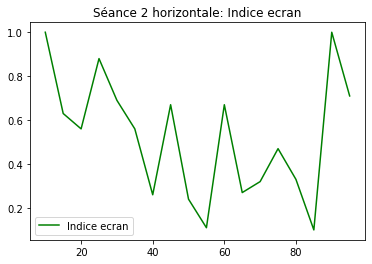

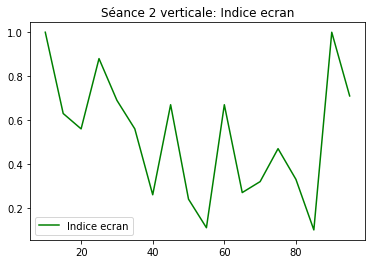

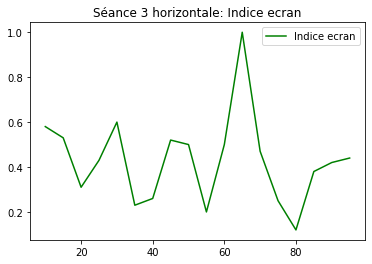

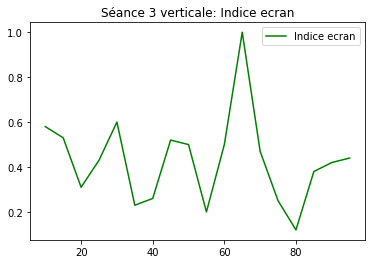

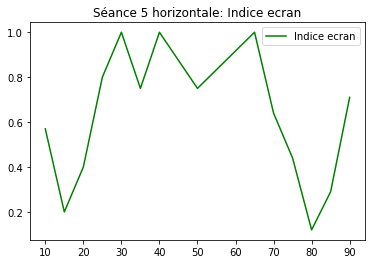

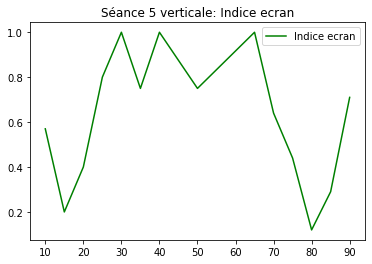

<Figure size 432x288 with 0 Axes>

In [111]:
plot_indice(d_l, arr)

In [ ]:

# Split the array based on parity
arr_even = arr[indices_even]
arr_odd = arr[indices_odd]

In [123]:
import os
import imageio

for i in [2,3,4,5]:
    for tab in ['Horizontal', 'Vertical']:
    # Folder path containing the images
        folder_path = f'picts/idea_1/{i}/{tab}'

        # List all image files in the folder
        image_files = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.png')])

        # Create a list to store the image frames
        frames = []

        # Read each image file and append it to the frames list
        for image_file in image_files:
            frames.append(imageio.imread(image_file))

        # Save the frames as a GIF file
        output_file = f'gif/{i}_{tab}.gif'
        imageio.mimsave(output_file, frames, duration=0.5)  # Adjust the duration as needed

print(f"GIF created: {output_file}")

C:\Users\33787\AppData\Local\Temp\ipykernel_19272\1016119668.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(image_file))


GIF created: gif/5_Vertical.gif


# Linking to atomic action

In [5]:
df2_aa = df2.copy()
df3_aa = df3.copy()
df4_aa = df4.copy()
df5_aa = df5.copy()

In [6]:
df2_aa['seconds'] = df2_aa['seconds'] - 132
df2_aa = df2_aa[df2['seconds'] < 3861]

df3_aa['seconds'] = df3['seconds'] - np.min(df3['seconds']) + 15.6

df4_aa['seconds'] = df4['seconds'] - np.min(df4['seconds']) + 12.4
df2_aa = df2_aa[df2['seconds'] < 2286]


df5_aa['seconds'] = df5['seconds'] - np.min(df5['seconds']) + 12.76
df5_aa = df5_aa[df5['seconds'] < 3861]

C:\Users\33787\AppData\Local\Temp\ipykernel_1220\3883974408.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_aa = df2_aa[df2['seconds'] < 2286]


In [7]:
arr = np.arange(5,105, 5)
l_aa = [df2_aa, df3_aa, df4_aa, df5_aa]
for df in l_aa:
    df = percent(df, arr, 5)

### Sender Agent

In [82]:
#Cleaning Horizontal
df2_aa['sender_agent'] = df2_aa['sender_agent'].replace('UbikeyOfficeHorizontal/1.4.4 (HALLNUMTBL05)', 'Horizontal')


#Cleaning vertical
df2_aa['sender_agent'] = df2_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA05)', 'Vertical')
df2_aa['sender_agent'] = df2_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA02)', 'Vertical')

#adding portal
df2_aa['po_to_H'] = df2_aa['portal'].notna() & (df2_aa['sender_agent'] == 'Horizontal')
df2_aa['po_to_V'] = df2_aa['portal'].notna() & (df2_aa['sender_agent'] == 'Vertical')
df2_aa['po'] = df2_aa.apply(lambda row: 'Po_to_V' if row['po_to_H'] else ('po_to_H' if row['po_to_V'] else np.nan), axis=1)

df3

In [83]:
#Cleaning Horizontal
df3_aa['sender_agent'] = df3_aa['sender_agent'].replace('UbikeyOfficeHorizontal/1.4.4 (HALLNUMTBL05)', 'Horizontal')

#Cleaning vertical
df3_aa['sender_agent'] = df3_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA05)', 'Vertical')
df3_aa['sender_agent'] = df3_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA02)', 'Vertical')

#adding portal
df3_aa['po_to_H'] = df3_aa['portal'].notna() & (df3_aa['sender_agent'] == 'Horizontal')
df3_aa['po_to_V'] = df3_aa['portal'].notna() & (df3_aa['sender_agent'] == 'Vertical')
df3_aa['po'] = df3_aa.apply(lambda row: 'Po_to_V' if row['po_to_H'] else ('po_to_H' if row['po_to_V'] else np.nan), axis=1)

df4

In [84]:
#Cleaning Horizontal
df4_aa['sender_agent'] = df4_aa['sender_agent'].replace('UbikeyOfficeHorizontal/1.4.4 (HALLNUMTBL05)', 'Horizontal')


#Cleaning vertical
df4_aa['sender_agent'] = df4_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA05)', 'Vertical')
df4_aa['sender_agent'] = df4_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA02)', 'Vertical')

#adding portal
df4_aa['po_to_H'] = df4_aa['portal'].notna() & (df4_aa['sender_agent'] == 'Horizontal')
df4_aa['po_to_V'] = df4_aa['portal'].notna() & (df4_aa['sender_agent'] == 'Vertical')
df4_aa['po'] = df4_aa.apply(lambda row: 'Po_to_V' if row['po_to_H'] else ('po_to_H' if row['po_to_V'] else np.nan), axis=1)

df5

In [85]:
#Cleaning Horizontal
df5_aa['sender_agent'] = df5_aa['sender_agent'].replace('UbikeyOfficeHorizontal/1.4.4 (HALLNUMTBL05)', 'Horizontal')


#Cleaning vertical
df5_aa['sender_agent'] = df5_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA05)', 'Vertical')
df5_aa['sender_agent'] = df5_aa['sender_agent'].replace('UbikeyOfficeVertical/1.4.4 (HALLNUMSTA02)', 'Vertical')

#adding portal
df5_aa['po_to_H'] = df5_aa['portal'].notna() & (df5_aa['sender_agent'] == 'Horizontal')
df5_aa['po_to_V'] = df5_aa['portal'].notna() & (df5_aa['sender_agent'] == 'Vertical')
df5_aa['po'] = df5_aa.apply(lambda row: 'Po_to_V' if row['po_to_H'] else ('po_to_H' if row['po_to_V'] else np.nan), axis=1)

### Plotting

Seance 2

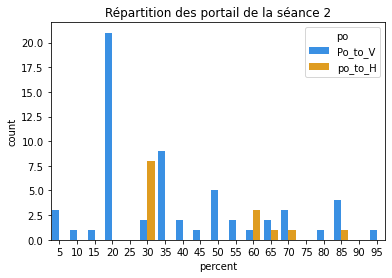

In [94]:
ax = sns.countplot(data=df2_aa[df2_aa['sender_agent'] == 'Horizontal' ], hue='action', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des actions de la séance 2 sur le tableau horizontal')
axf = ax.figure
axf.savefig('picts/atomic_actions/2_action_hor.png')

plt.clf()
ax = sns.countplot(data=df2_aa[df2_aa['sender_agent'] == 'Vertical' ], hue='action', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des actions de la séance 2 sur le tableau vertical')
axf = ax.figure
axf.savefig('picts/atomic_actions/2_action_ver.png')

plt.clf()
ax = sns.countplot(data=df2_aa, hue='po', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des portail de la séance 2')
axf = ax.figure
axf.savefig('picts/atomic_actions/2_por.png')


Seance 3

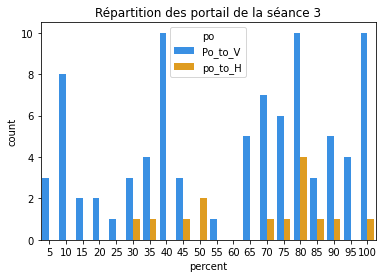

In [93]:
ax = sns.countplot(data=df3_aa[df3_aa['sender_agent'] == 'Horizontal' ], hue='action', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des actions de la séance 3 sur le tableau horizontal')
axf = ax.figure
axf.savefig('picts/atomic_actions/3_action_hor.png')

plt.clf()
ax = sns.countplot(data=df3_aa[df3_aa['sender_agent'] == 'Vertical' ], hue='action', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des actions de la séance 3 sur le tableau vertical')
axf = ax.figure
axf.savefig('picts/atomic_actions/3_action_ver.png')

plt.clf()
ax = sns.countplot(data=df3_aa, hue='po', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des portail de la séance 3')
axf = ax.figure
axf.savefig('picts/atomic_actions/3_por.png')


Seance 4

Manque la table horizontal

Seance 5

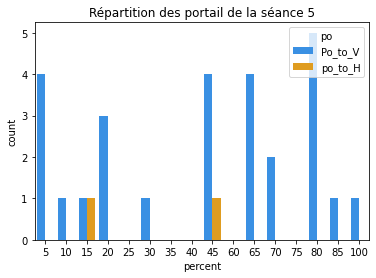

In [95]:
ax = sns.countplot(data=df5_aa[df5_aa['sender_agent'] == 'Horizontal'], hue='action', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des actions de la séance 5 sur le tableau horizontal')
axf = ax.figure
axf.savefig('picts/atomic_actions/5_action_hor.png')

plt.clf()
ax = sns.countplot(data=df5_aa[df5_aa['sender_agent'] == 'Vertical' ], hue='action', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des actions de la séance 5 sur le tableau vertical')
axf = ax.figure
axf.savefig('picts/atomic_actions/5_action_ver.png')

plt.clf()
ax = sns.countplot(data=df5_aa, hue='po', x='percent', palette=['dodgerblue','orange','green'])
ax.set_title('Répartition des portail de la séance 5')
axf = ax.figure
axf.savefig('picts/atomic_actions/5_por.png')
